# Benchmark Terminal State Identification

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

import matplotlib.pyplot as plt
import mplscience
import seaborn as sns
from matplotlib import rcParams

import cellrank as cr
import scanpy as sc
import scvelo as scv
import scvi

from rgv_tools import DATA_DIR, FIG_DIR
from rgv_tools.benchmarking import get_tsi_score, plot_tsi
from rgv_tools.core import METHOD_PALETTE_TSI
from rgv_tools.plotting._significance import add_significance, get_significance

/home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/icb/weixu.wang/miniconda3/envs/regvelo_t

# General setting

In [2]:
scvi.settings.seed = 0

[rank: 0] Seed set to 0


In [3]:
plt.rcParams["svg.fonttype"] = "none"
sns.reset_defaults()
sns.reset_orig()
scv.settings.set_figure_params("scvelo", dpi_save=400, dpi=80, transparent=True, fontsize=14, color_map="viridis")

## Constants

In [19]:
DATASET = "scale_murine"

SAVE_FIGURES = True
if SAVE_FIGURES:
    (FIG_DIR / DATASET).mkdir(parents=True, exist_ok=True)

FIGURE_FORMATE = "svg"

In [5]:
VELOCITY_METHODS = ["regvelo", "scvelo", "velovi"]

In [6]:
TERMINAL_STATE = [
    "Melanocytes",
    "enFib",
    "SC",
    "Mesenchyme",
    "Sensory",
    "ChC",
    "SatGlia",
    "Gut_glia",
    "Gut_neuron",
    "Symp",
    "BCC",
]

In [7]:
thresholds = np.linspace(0.1, 1, 21)[:20]

## Compute TSI

In [8]:
tsi_scale = []
for scale_level in range(2, 6):
    ks = {}

    g = []
    for method in VELOCITY_METHODS:
        adata = sc.read_h5ad(
            DATA_DIR / DATASET / "processed" / f"adata_run_stage_{scale_level}_{method}_all_regulons.h5ad"
        )
        g.append(adata.shape[0])
        ## construct graph
        vk = cr.kernels.VelocityKernel(adata).compute_transition_matrix()
        ck = cr.kernels.ConnectivityKernel(adata).compute_transition_matrix()
        ks[method] = 0.8 * vk + 0.2 * ck

    estimators = {}
    tsi = {}

    num_max_states = 10
    if scale_level == 5:
        num_max_states = 15

    for method in VELOCITY_METHODS:
        estimators[method] = cr.estimators.GPCCA(ks[method])
        tsi[method] = get_tsi_score(
            adata,
            thresholds,
            "assignments",
            set(adata.obs["assignments"].unique().tolist()).intersection(TERMINAL_STATE),
            estimators[method],
            max_states=num_max_states,
        )

    tsi_scale.append(tsi)

  0%|          | 0/3926 [00:00<?, ?cell/s]

  0%|          | 0/3926 [00:00<?, ?cell/s]

  0%|          | 0/3926 [00:00<?, ?cell/s]

  0%|          | 0/3926 [00:00<?, ?cell/s]

  0%|          | 0/3926 [00:00<?, ?cell/s]

  0%|          | 0/3926 [00:00<?, ?cell/s]

  0%|          | 0/5139 [00:00<?, ?cell/s]

  0%|          | 0/5139 [00:00<?, ?cell/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind and https://petsc.org/release/faq/
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: to get more information on the crash.


  0%|          | 0/5139 [00:00<?, ?cell/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind and https://petsc.org/release/faq/
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: to get more information on the crash.


  0%|          | 0/5139 [00:00<?, ?cell/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind and https://petsc.org/release/faq/
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: to get more information on the crash.


  0%|          | 0/5139 [00:00<?, ?cell/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind and https://petsc.org/release/faq/
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: to get more information on the crash.
Abort(59) on node 0 (rank 0 in comm 0): application called MPI_Abort(MPI_COMM_WORLD, 59) - process 0


  0%|          | 0/5139 [00:00<?, ?cell/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind and https://petsc.org/release/faq/
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: to get more information on the crash.
Abort(59) on node 0 (rank 0 in comm 0): application called MPI_Abort(MPI_COMM_WORLD, 59) - process 0


  0%|          | 0/6273 [00:00<?, ?cell/s]

  0%|          | 0/6273 [00:00<?, ?cell/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind and https://petsc.org/release/faq/
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: to get more information on the crash.


  0%|          | 0/6273 [00:00<?, ?cell/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind and https://petsc.org/release/faq/
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: to get more information on the crash.


  0%|          | 0/6273 [00:00<?, ?cell/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind and https://petsc.org/release/faq/
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: to get more information on the crash.


  0%|          | 0/6273 [00:00<?, ?cell/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind and https://petsc.org/release/faq/
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: to get more information on the crash.


  0%|          | 0/6273 [00:00<?, ?cell/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind and https://petsc.org/release/faq/
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: to get more information on the crash.
Abort(59) on node 0 (rank 0 in comm 0): application called MPI_Abort(MPI_COMM_WORLD, 59) - process 0


  0%|          | 0/8821 [00:00<?, ?cell/s]

  0%|          | 0/8821 [00:00<?, ?cell/s]

  0%|          | 0/8821 [00:00<?, ?cell/s]

  0%|          | 0/8821 [00:00<?, ?cell/s]

  0%|          | 0/8821 [00:00<?, ?cell/s]

  0%|          | 0/8821 [00:00<?, ?cell/s]

## Plot TSI benchmark on each scale

velovi:7.827229644930834e-14 scvelo:1.9725858953433486e-59


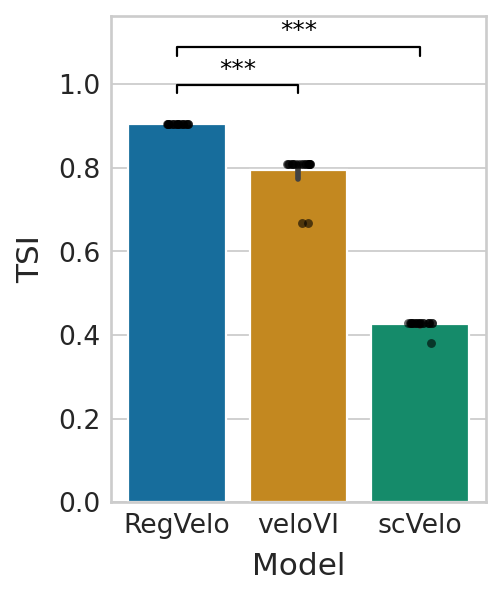

velovi:0.0 scvelo:0.0


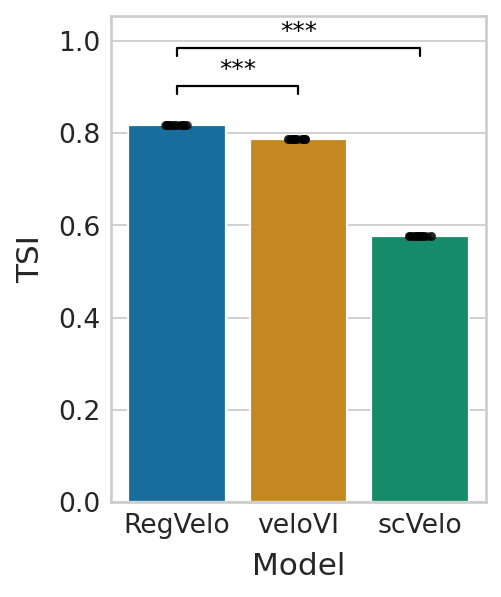

velovi:0.0 scvelo:0.0


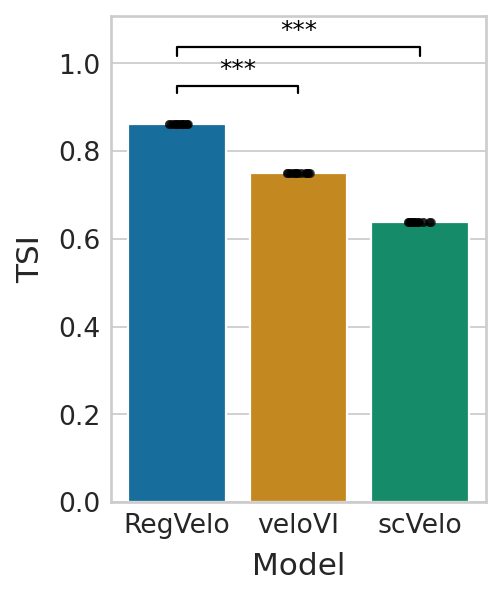

velovi:0.0 scvelo:9.71010180139941e-64


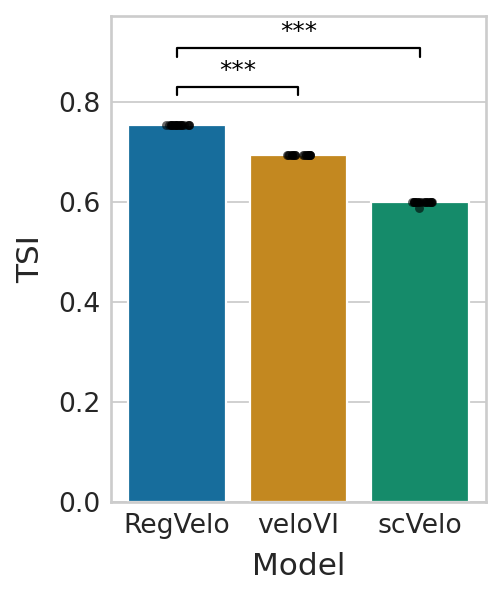

In [11]:
for scale_level in range(4):
    tsi = tsi_scale[scale_level]

    df = pd.DataFrame(
        {
            "TSI": tsi["regvelo"] + tsi["velovi"] + tsi["scvelo"],
            "Model": ["RegVelo"] * 20 + ["veloVI"] * 20 + ["scVelo"] * 20,
        }
    )

    with mplscience.style_context():
        sns.set_style(style="whitegrid")
        fig, ax = plt.subplots(figsize=(3, 4))

        sns.barplot(data=df, x="Model", y="TSI", palette="colorblind", ax=ax)

        # Add jittered dots
        sns.stripplot(data=df, x="Model", y="TSI", color="black", jitter=True, dodge=True, ax=ax, alpha=0.6, size=4)

        ttest_res = ttest_ind(tsi["regvelo"], tsi["velovi"], alternative="greater")
        significance = get_significance(ttest_res.pvalue)
        significance_vv = ttest_res.pvalue

        add_significance(
            ax=ax,
            left=0,
            right=1,
            significance=significance,
            lw=1,
            bracket_level=1.05,
            c="k",
            level=0,
        )

        ttest_res = ttest_ind(tsi["regvelo"], tsi["scvelo"], alternative="greater")
        significance = get_significance(ttest_res.pvalue)
        significance_sv = ttest_res.pvalue

        add_significance(ax=ax, left=0, right=2, significance=significance, lw=1, c="k", level=2, bracket_level=0.9)

        y_min, y_max = ax.get_ylim()
        ax.set_ylim([y_min, y_max + 0.02])
        print("velovi:" + str(significance_vv) + " " + "scvelo:" + str(significance_sv))
        # if SAVE_FIGURES:
        #    fig.savefig(FIG_DIR / DATASET / f"tsi_benchmark_stage_{scale_level}_all_regulons.svg", format="svg", transparent=True, bbox_inches="tight")
        plt.show()

In [13]:
df_all = []
for i in range(4):
    tsi = tsi_scale[i]

    df = pd.DataFrame(
        {
            "TSI": tsi["regvelo"] + tsi["velovi"] + tsi["scvelo"],
            "Model": ["RegVelo"] * 20 + ["veloVI"] * 20 + ["scVelo"] * 20,
        }
    )

    df["scale"] = str(i + 1)
    df_all.append(df)

df = pd.concat(df_all, axis=0)
df

,TSI,Model,scale
0,0.904762,RegVelo,1
1,0.904762,RegVelo,1
2,0.904762,RegVelo,1
3,0.904762,RegVelo,1
4,0.904762,RegVelo,1
...,...,...,...
55,0.600000,scVelo,4
56,0.600000,scVelo,4
57,0.600000,scVelo,4
58,0.600000,scVelo,4


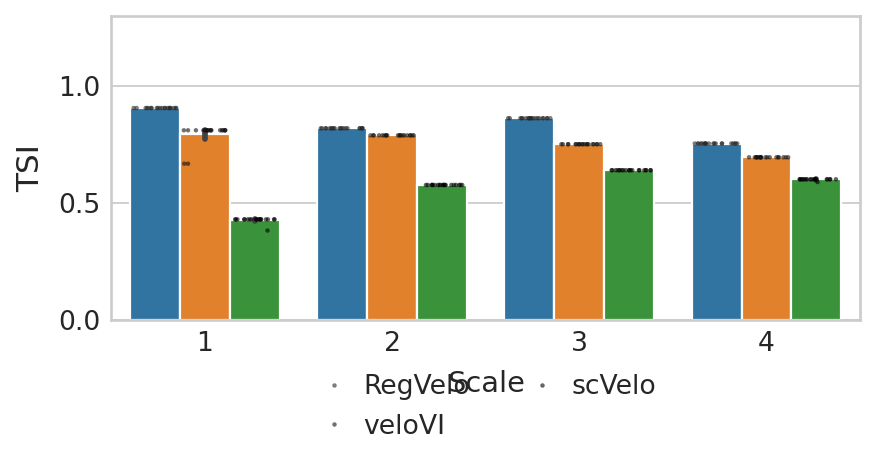

In [24]:
with mplscience.style_context():
    sns.set_style(style="whitegrid")
    fig, ax = plt.subplots(figsize=(6, 2.5))

    # Plot the barplot without error bars
    sns.barplot(data=df, x="scale", y="TSI", hue="Model", ax=ax)

    # Add jittered dots
    sns.stripplot(
        data=df, x="scale", y="TSI", hue="Model", dodge=True, color="black", ax=ax, jitter=0.35, size=2, alpha=0.6
    )

    # Remove the duplicate legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[3:6], labels[3:6], bbox_to_anchor=(0.5, -0.1), loc="upper center", ncol=2)

    # Customize labels and other settings
    ax.set(xlabel="", ylabel="TSI")
    ax.set_xlabel(xlabel="Scale", fontsize=13)
    ax.set_ylim(0, 1.3)

    if SAVE_FIGURES:
        plt.savefig(FIG_DIR / DATASET / "tsi_benchmark.svg", format="svg", transparent=True, bbox_inches="tight")
    plt.show()